<a href="https://colab.research.google.com/github/Bhavesh-github-zen/ML_Project_Bank_Personal_Loan_Modelling/blob/master/MLProject_BankPersonalLoanModelling_BhaveshSSonewale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Marketing Campaign for Banking Products**


# **Problem statement:-**

**Project Title:**
***Marketing Campaign for Banking Products***

***Data Description:***
The file Bank_loan_project.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

***Context:***
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

***Attribute Information:***

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# **1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc.**



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'numpy'

In [2]:
# Importing csv data and view data
data=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# Checking the shape of data means no. of rows and columns.
data.shape

(5000, 14)

In [4]:
# Checking the first 5 rows
# by default the head() method gives the first 5 rows but if we need more rows then simply mention how many first rows you want.
# For example if we want first 10 rows then simply write data.head(10)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Checking the last 5 rows
# by default the tail() method gives the last 5 rows but if we need more rows then simply mention how many last rows you want.
# For example if we want last 10 rows then simply write data.tail(10) 
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
# Checking the data types of each columns
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
# Converting the data type of 'Personal Loan' from int to category
data['Personal Loan']=data['Personal Loan'].astype('category')

In [8]:
#checking that the data type of 'Personal Loan' is converted to category or not
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan         category
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [9]:
# Checking the count, mean, min, max, etc values of each columns of our data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
# Checking the concise summary of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


In [11]:
# Checking the null values in our data
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#**2. Check if you need to clean the data for any of the variables.**

**Cleansing of data**

In [12]:
# Replacing all the negative values of experience column into nan values and then applied .describe method 
data['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

data['Experience'].fillna(data['Experience'].median(),inplace=True)

data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
# Removing the 'ID' and 'Experience' column as it won't reqiured for determining accuracy of training and testing dataset because 
# 'ID' is randomly generated number given to the customer and 'experience' is also not related with the 'Personal Loan'.
data=data.drop(['ID','Experience'],axis=1)

# Checking the first 5 rows
# by default the head() method gives the first 5 rows but if we need more rows then simply mention how many first rows you want.
# For example if we want first 10 rows then simply write data.head(10)
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
# Checking the shape of data means no. of rows and columns.
# Because we removed the 'ID' and 'Experience' therefore there are now total 12 columns remaining out of 14 columns. 
data.shape

(5000, 12)

In [15]:
# Checking the last 5 rows
# by default the tail() method gives the last 5 rows but if we need more rows then simply mention how many last rows you want.
# For example if we want last 10 rows then simply write data.tail(10)
data.tail()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,83,92612,3,0.8,1,0,0,0,0,1,1


# **3. EDA: Study the data distribution in each attribute and target variable, share your findings.**

##Number of unique in each column.

In [16]:
# .columns method is used to return the column labels of our data.
d_c=data.columns

In [17]:
# Applying 'for' loop to calculate no. of uniques in each columns of our data.
# This is helpful for us in determining which column of our data contains numerical data or categorical data.
for i in d_c:
  data[i].unique()
  print(i +" :   "+str(len(data[i].unique())))

Age :   45
Income :   162
ZIP Code :   467
Family :   4
CCAvg :   108
Education :   3
Mortgage :   347
Personal Loan :   2
Securities Account :   2
CD Account :   2
Online :   2
CreditCard :   2


In [18]:
# After calculating the no. of uniques in each column by above method, I found another method which does the same work as we did in above cell by applying for loop.
# This method is nunique() which gives us no. of unique in each column just by writing one line of code.
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

##Number of people with zero mortgage.

In [19]:
# Calculating the no. of people with zero mortgage by using list and by applying for loop.
d=list(data['Mortgage'])
count=0
for i in d:
  if i==0:
    count=count+1
print(count)

3462


##Number of people with zero credit card spending per month.

In [20]:
# Calculating the no. of people with zero credit card spending per month by using list and by applying for loop.
c=list(data['CCAvg'])
count1=0
for i in c:
  if i==0:
    count1=count1+1
print(count1)

106


##Value counts of all categorical columns.

In [21]:
# Calculating value counts of all categorical coilumns by applying .value_counts() method.
print("Value count of Family :  " + "\n" + str(data['Family'].value_counts()))
print("\n")
print("Value count of Education :  " + "\n" + str(data['Education'].value_counts()))
print("\n")
print("Value count of Personal Loan :  " + "\n" + str(data['Personal Loan'].value_counts()))
print("\n")
print("Value count of Securities Account :  " + "\n" + str(data['Securities Account'].value_counts()))
print("\n")
print("Value count of CD Account :  " + "\n" + str(data['CD Account'].value_counts()))
print("\n")
print("Value count of Online :  " + "\n" + str(data['Online'].value_counts()))
print("\n")
print("Value count of CreditCard :  " + "\n" + str(data['CreditCard'].value_counts()))

Value count of Family :  
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


Value count of Education :  
1    2096
3    1501
2    1403
Name: Education, dtype: int64


Value count of Personal Loan :  
0    4520
1     480
Name: Personal Loan, dtype: int64


Value count of Securities Account :  
0    4478
1     522
Name: Securities Account, dtype: int64


Value count of CD Account :  
0    4698
1     302
Name: CD Account, dtype: int64


Value count of Online :  
1    2984
0    2016
Name: Online, dtype: int64


Value count of CreditCard :  
0    3530
1    1470
Name: CreditCard, dtype: int64


##Univariate and Bivariate analysis

***Univariate Analysis***

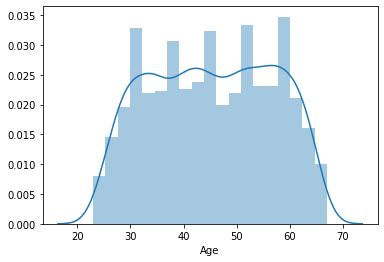

In [22]:
sns.distplot(data['Age'])

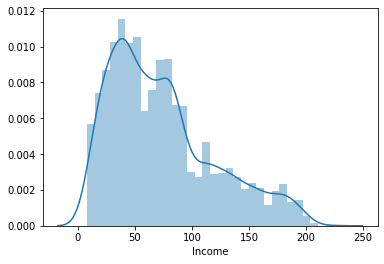

In [23]:
sns.distplot(data['Income'])

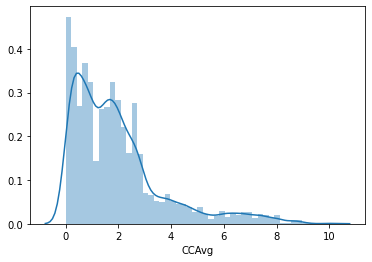

In [24]:
sns.distplot(data['CCAvg'])

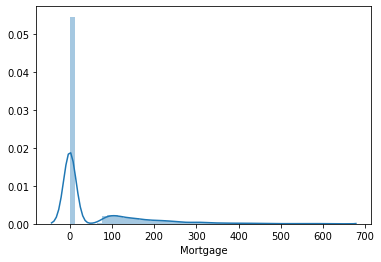

In [25]:
sns.distplot(data['Mortgage'])

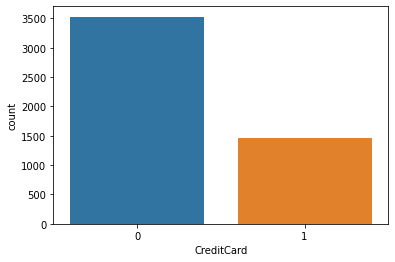

In [26]:
sns.countplot(x='CreditCard',data=data)

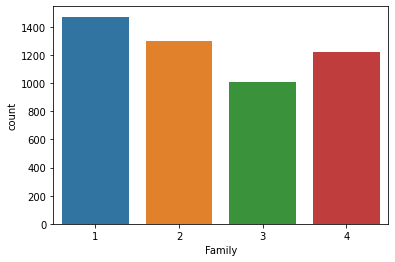

In [27]:
sns.countplot(x='Family',data=data)

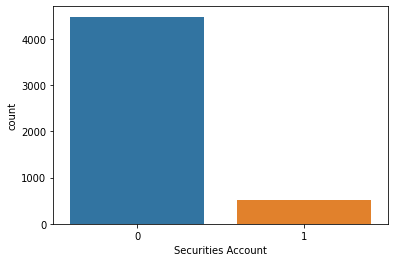

In [28]:
sns.countplot(x='Securities Account',data=data)

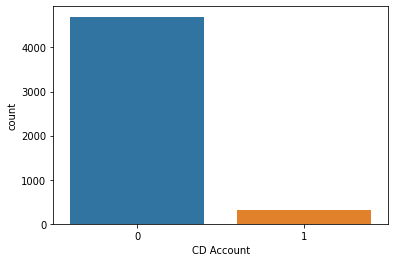

In [29]:
sns.countplot(x='CD Account',data=data)

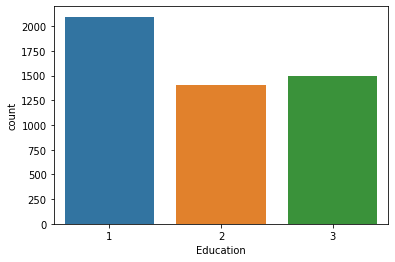

In [30]:
sns.countplot(x='Education',data=data)

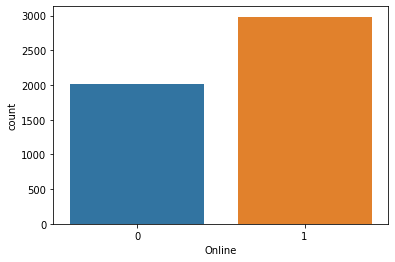

In [31]:
sns.countplot(x='Online',data=data)

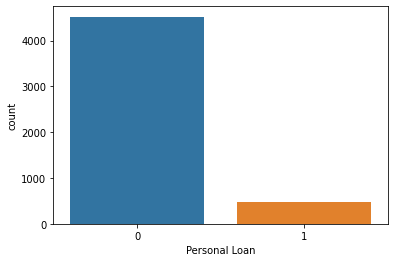

In [32]:
sns.countplot(x='Personal Loan',data=data)

***Bivariate and Multivariate Analysis***

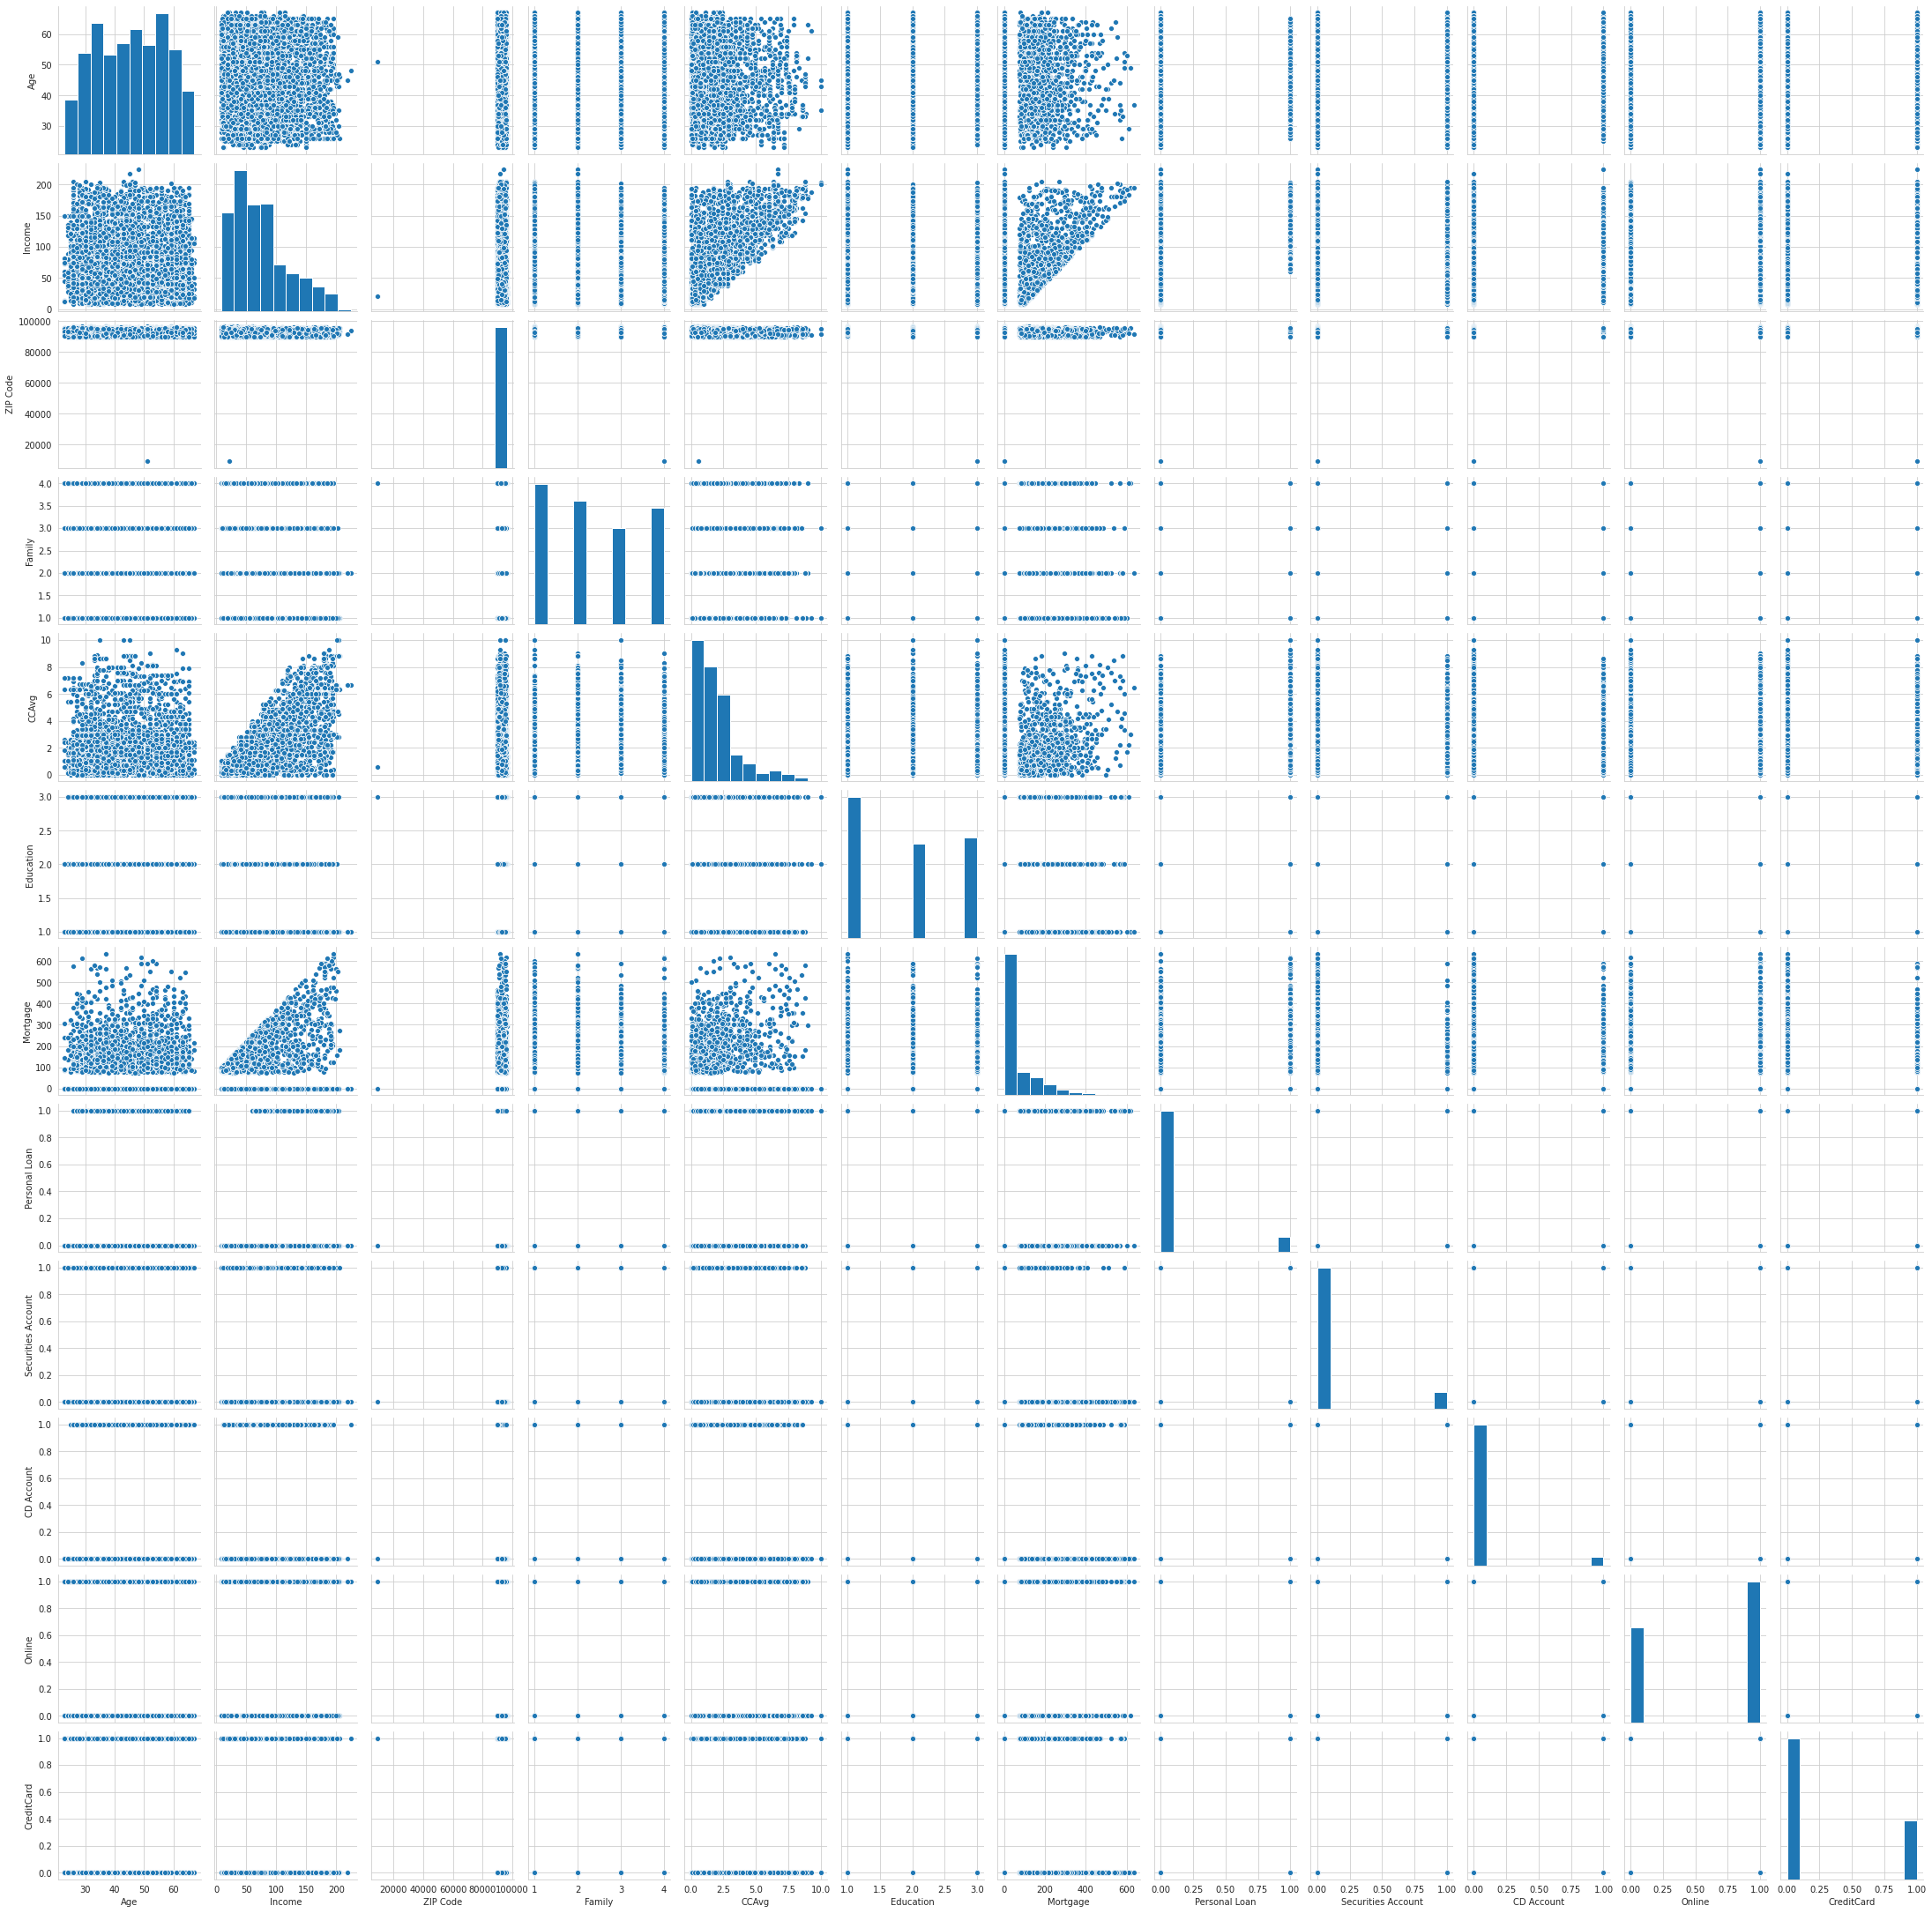

In [33]:
sns.set_style('whitegrid')
sns.pairplot(data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


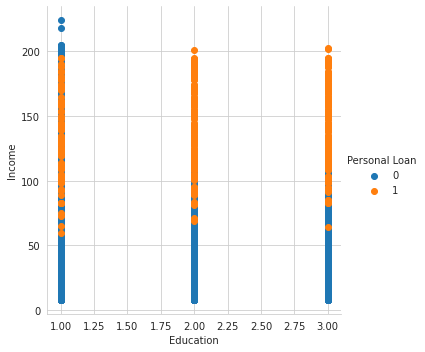

In [34]:
sns.FacetGrid(data,hue="Personal Loan",size=5).map(plt.scatter,"Education","Income").add_legend()
plt.show()

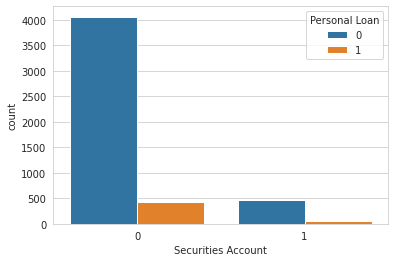

In [35]:
sns.countplot(x='Securities Account',data=data,hue='Personal Loan')

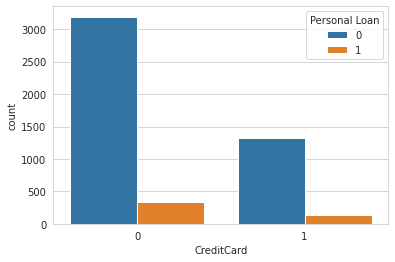

In [36]:
sns.countplot(x='CreditCard',data=data,hue='Personal Loan')

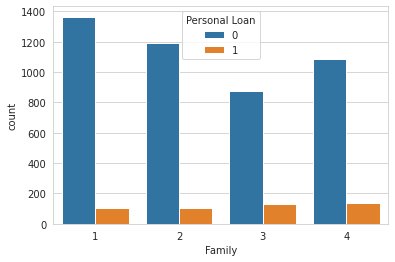

In [37]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

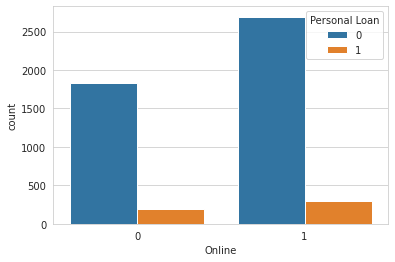

In [38]:
sns.countplot(x='Online',data=data,hue='Personal Loan')


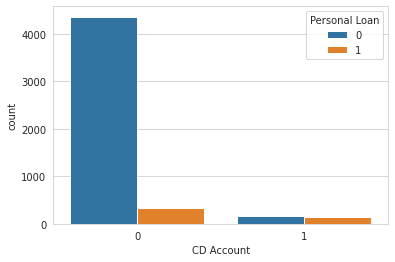

In [39]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

# **4. Apply necessary transformations for the feature variables.**

In [40]:
# here I applied Boxcox transformation for the feature variables
# function to plot a histogram and Q-Q plot side by side , for a certain variable
def transform_plot(data_tr, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data_tr[variable].hist()

  plt.subplot(1,2,2)
  stats.probplot(data_tr[variable], dist="norm", plot=plt)

  plt.show()

Parameters/optimal lambda:  0.26245789911013795


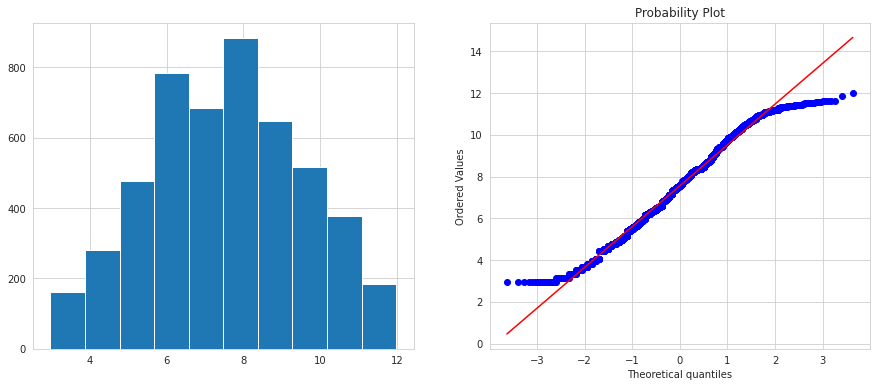

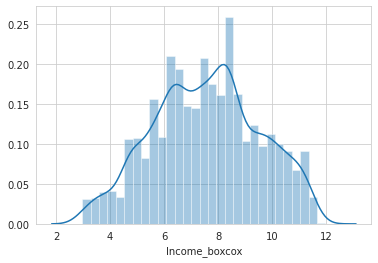

In [41]:
# Boxcox transformation for 'income'
data['Income_boxcox'], param = stats.boxcox(data.Income+1)
print('Parameters/optimal lambda: ', param)

transform_plot(data,'Income_boxcox')
sns.distplot(data['Income_boxcox'])
# here by seeing Q-Q plot, I come to know that I need to apply Logistic Regression in further steps

Parameters/optimal lambda:  -0.2623465859490784


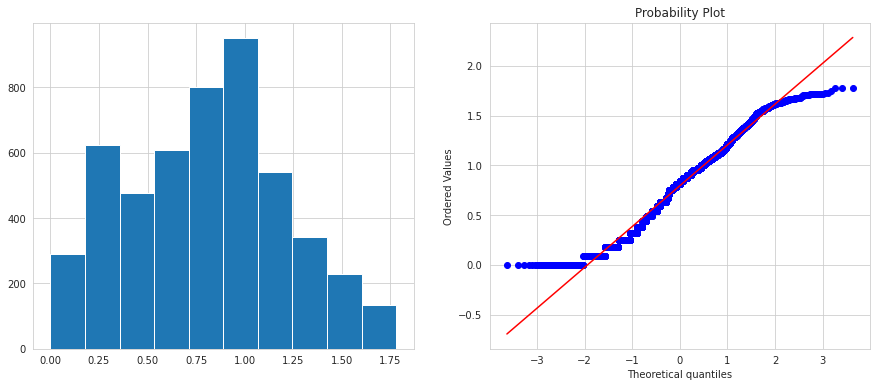

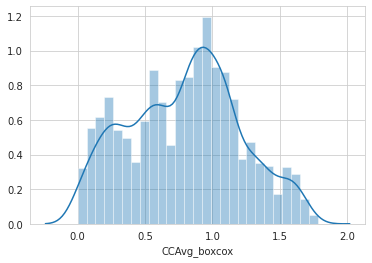

In [42]:
# Boxcox transformation for 'CCAvg'
data['CCAvg_boxcox'], param = stats.boxcox(data.CCAvg+1)
print('Parameters/optimal lambda: ', param)

transform_plot(data,'CCAvg_boxcox')
sns.distplot(data['CCAvg_boxcox'])
# here by seeing Q-Q plot, I come to know that I need to apply Logistic Regression in further steps

In [43]:
# I also applied the Boxcox transformation for mortgage but I didn't got expected result
# That's why I choose to go with another transformation

#data['Mortgage_boxcox'], param = stats.boxcox(data_x.Mortgage+1)

#print('Parameters/optimal lambda: ', param)

#transform_plot(data,'Mortgage_boxcox')
#sns.distplot(data['Mortgage_boxcox'])

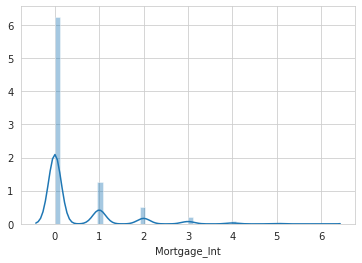

In [44]:
# In this cell, I have applied Binning tranformation for Mortgage
data['Mortgage_Int']=pd.cut(data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data.drop(['Mortgage'],axis=1,inplace=True)
sns.distplot(data['Mortgage_Int'])

In [45]:
# defining the data_x and data_y for training and testing purpose
data_x = data.loc[:,data.columns != "Personal Loan"]
data_y = data[['Personal Loan']]

In [46]:
# removing the 'Income','ZIP Code','CCAvg' columns from the data_x as it is not required for further steps
data_x=data_x.drop(['Income','ZIP Code','CCAvg'],axis=1)
data_x["Mortgage_Int"]=data_x["Mortgage_Int"].astype('int64')

In [47]:
# checking datatypes of each cloumns in data_x
data_x.dtypes

Age                     int64
Family                  int64
Education               int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Income_boxcox         float64
CCAvg_boxcox          float64
Mortgage_Int            int64
dtype: object

In [48]:
#data_x.head()

# **5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively.**

In [49]:
# splitting of data into training set and testing set in the ratio 70:30
# 70% training set is used to train the model and 30% testing set id used to test the model 
train_X, test_X, train_Y, test_Y = train_test_split(data_x, data_y, test_size = 0.3, stratify = data_y, random_state=0)

In [50]:
# printing the shape of train_X, test_X, train_Y, test_Y
print("Shape of train_X: ",train_X.shape)
print("Shape of test_X: ",test_X.shape,"\n")

print("Shape of train_Y: ",train_Y.shape)
print("Shape of test_Y: ",test_Y.shape)

Shape of train_X:  (3500, 10)
Shape of test_X:  (1500, 10) 

Shape of train_Y:  (3500, 1)
Shape of test_Y:  (1500, 1)


In [51]:
# here applying 'l2' normalisation for train_X, test_X, train_Y, test_Y
from sklearn import preprocessing
train_X = preprocessing.normalize(train_X,norm='l2')
test_X = preprocessing.normalize(test_X,norm='l2')
train_Y = preprocessing.normalize(train_Y,norm='l2')
test_Y = preprocessing.normalize(test_Y,norm='l2')
"""print(train_X)
print(test_X)
print(train_Y)
print(test_Y)"""

'print(train_X)\nprint(test_X)\nprint(train_Y)\nprint(test_Y)'

In [52]:
# here I comment the standard scaling technique because I just want to compare above 'l2' normalisation technique with standard scaling technique
# I got good result with 'l2' normalisation technique thats why I choose to go with 'l2' normalisation technique instead of going with StandardScaler technique
"""from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
scaling.fit_transform(train_X)
scaling.fit_transform(test_X)
scaling.fit_transform(train_Y)
scaling.fit_transform(test_Y)"""

'from sklearn.preprocessing import StandardScaler\nscaling= StandardScaler()\nscaling.fit_transform(train_X)\nscaling.fit_transform(test_X)\nscaling.fit_transform(train_Y)\nscaling.fit_transform(test_Y)'

# **6. Using the Logistic Regression model to predict the likelihood of a customer buying personal loans.**
#**7. Printing all the metrics related for evaluating the model performance.**
#**8. Building various other classification algorithms and comparing their performance.**

In [53]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

In [54]:
# Fitting logistic regression to Training Set
class_names = ['wont take loan', 'take loan']
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Results: 
Training Accuracy: 0.9
Testing Accuracy: 0.9
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1356
         1.0       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


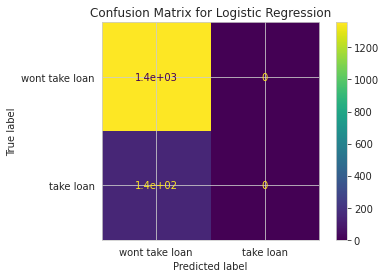

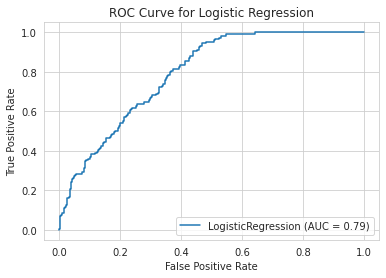

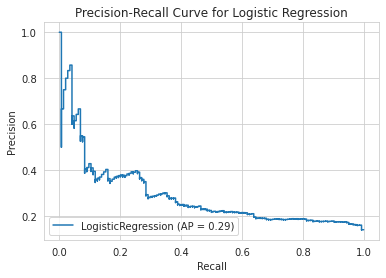

In [55]:
# printing the results of Logistic regression
# printing the training accuracy, testing accuracy, precision value, recall value
# plotting the confusion matrix, ROC curve and Precision-recall curve for the logistic regression
print('Logistic Regression Results: ')

train_score = log_reg.score(train_X,train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_X,test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_log = log_reg.predict(test_X)

precision_logi = precision_score(test_Y, y_pred_log, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_Y, y_pred_log).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg,test_X,test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg,test_X,test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg,test_X,test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')
print(classification_report(test_Y,y_pred_log))

In [56]:
# Fitting KNeighbors classifier to Training Set
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

K Neighbors Classifier Results: 
Training Accuracy: 0.96
Testing Accuracy: 0.93
Precision: 0.69
Recall: 0.41
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1356
         1.0       0.69      0.41      0.52       144

    accuracy                           0.93      1500
   macro avg       0.82      0.70      0.74      1500
weighted avg       0.92      0.93      0.92      1500



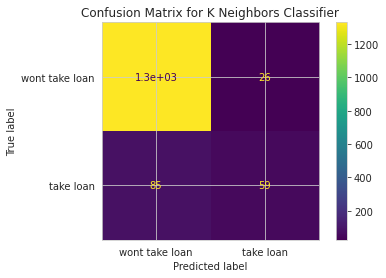

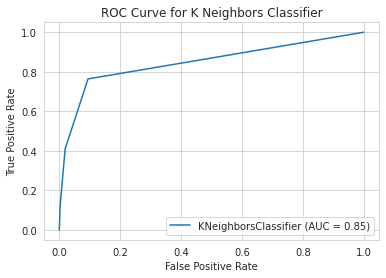

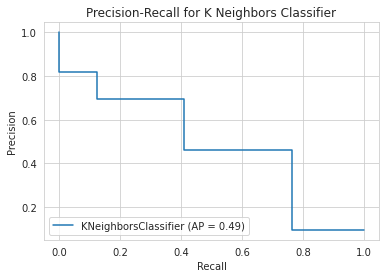

In [57]:
# printing the results of KNeighbors classifier
# printing the training accuracy, testing accuracy, precision value, recall value
# plotting the confusion matrix, ROC curve and Precision-recall curve for the KNeighbors classifier
print('K Neighbors Classifier Results: ')

knntrain_score = knn.score(train_X,train_Y)
print('Training Accuracy:', knntrain_score.round(2))
knntest_score = knn.score(test_X,test_Y)
print('Testing Accuracy:', knntest_score.round(2))

y_pred_knn = knn.predict(test_X)

precision_knn = precision_score(test_Y, y_pred_knn, labels=class_names).round(2)
print('Precision:', precision_knn)
recall_knn = recall_score(test_Y, y_pred_knn).round(2)
print('Recall:', recall_knn)

plot_confusion_matrix(knn,test_X,test_Y, display_labels=class_names)
plt.title('Confusion Matrix for K Neighbors Classifier')

plot_roc_curve(knn,test_X,test_Y)
plt.title('ROC Curve for K Neighbors Classifier')

plot_precision_recall_curve(knn,test_X,test_Y)
plt.title('Precision-Recall for K Neighbors Classifier')
print(classification_report(test_Y,y_pred_knn))

In [58]:
#Fitting Decision Tree classifier to Training Set
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Decision Tree Classifier Results: 
Training Accuracy: 1.0
Testing Accuracy: 0.95
Precision: 0.74
Recall: 0.76
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1356
         1.0       0.74      0.76      0.75       144

    accuracy                           0.95      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.95      0.95      0.95      1500



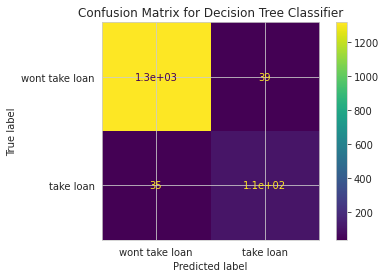

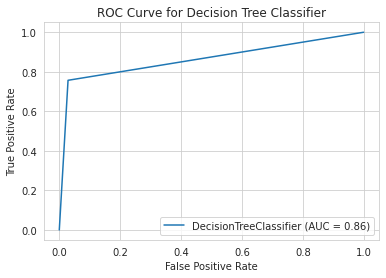

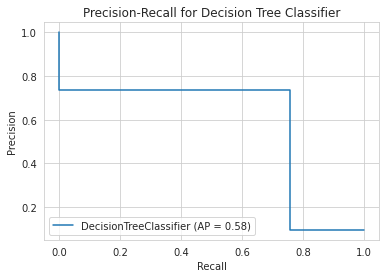

In [59]:
# printing the results of Decision Tree classifier
# printing the training accuracy, testing accuracy, precision value, recall value
# plotting the confusion matrix, ROC curve and Precision-recall curve for the Decision Tree classifier
print('Decision Tree Classifier Results: ')

trainscore = dt_clf.score(train_X,train_Y)
print('Training Accuracy:', trainscore.round(2))
testscore = dt_clf.score(test_X,test_Y)
print('Testing Accuracy:', testscore.round(2))

y_pred_dt = dt_clf.predict(test_X)

precision_dt = precision_score(test_Y, y_pred_dt, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_pred_dt).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dt_clf,test_X,test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dt_clf,test_X,test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dt_clf,test_X,test_Y)
plt.title('Precision-Recall for Decision Tree Classifier')
print(classification_report(test_Y,y_pred_dt))

In [60]:
# Fitting Random Forest classifier to Training Set
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.94
Precision: 0.95
Recall: 0.4
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1356
         1.0       0.95      0.40      0.56       144

    accuracy                           0.94      1500
   macro avg       0.94      0.70      0.76      1500
weighted avg       0.94      0.94      0.93      1500



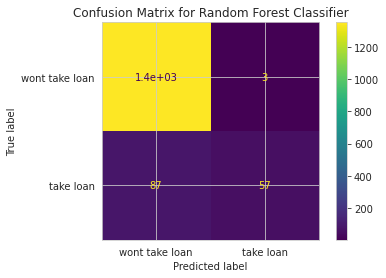

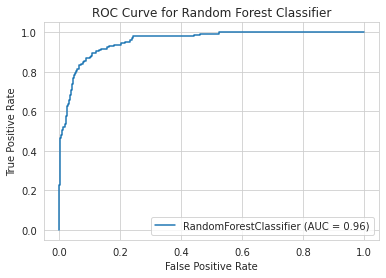

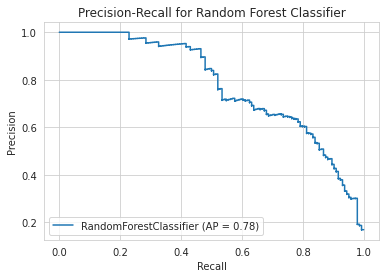

In [61]:
# printing the results of Random Forest classifier
# printing the training accuracy, testing accuracy, precision value, recall value
# plotting the confusion matrix, ROC curve and Precision-recall curve for the Random Forest classifier
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(train_X,train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(test_X,test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(test_X)

precision_rf = precision_score(test_Y, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_Y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf,test_X,test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf,test_X,test_Y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf,test_X,test_Y)
plt.title('Precision-Recall for Random Forest Classifier')
print(classification_report(test_Y,y_pred_rf))

#**CONCLUSION**

**###############################################** **CONCLUSION** **###############################################**

We want to make a model which predicts whether the customer will take a personal loan or not.


1) I have imported all the necessary libraries which is required for our model.

2) From the data I get to know that our 'Age' and 'Experience' column is highly correlated, that's why I dropped the 'Experience' column. I also dropped the 'ID' column because it is randomly generated number given to the customer for identification purpose which has no relation with the personal loan.

3) Later in the further steps, after applying transformation I also removed the 'ZIP Code' column because it is not required for our model and also removed the original 'Income', 'CCAvg', 'Mortgage' columns because after applying transformation I have new transformed data for Income(Income_boxcox), CCAvg(CCAvg_boxcox) and Mortgage(Mortgage_Int).

4) Then after splitting the data into training set and testing set, I applied Logistic Regression, KNeighbors Classifier, Decision Tree Classifier and Random Forest Classifier and after comparing the results, I found that Random Forest Classifier and KNeighbors Classifier giving me the best accuracy as compared to logistic regression and Decision tree classifier. Here is the complete details:-


  **/////////////////////////////////////////////////////////////////////////////////////////////////////////** **Logistic Regression** **//////////////////////////////////////////////////////////////////////////////////////////////////////////**

Logistic Regression Results: 

Training Accuracy: 0.9

Testing Accuracy: 0.9

Precision: 0.0

Recall: 0.0

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1356
         1.0       0.00      0.00      0.00       144

    accuracy                           0.90      1500
    macro avg      0.45      0.50      0.47      1500
    weighted avg   0.82      0.90      0.86      1500

  **//////////////////////////////////////////////////////////////////////////////////////////////////////// KNeighbors Classifier /////////////////////////////////////////////////////////////////////////////////////////////////////////**

K Neighbors Classifier Results: 

Training Accuracy: 0.96

Testing Accuracy: 0.93

Precision: 0.69

Recall: 0.41

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1356
         1.0       0.69      0.41      0.52       144

    accuracy                           0.93      1500
    macro avg      0.82      0.70      0.74      1500
    weighted avg   0.92      0.93      0.92      1500

  **/////////////////////////////////////////////////////////////////////////////////////////////////////// Decision Tree Classifier ///////////////////////////////////////////////////////////////////////////////////////////////////////**

Decision Tree Classifier Results: 

Training Accuracy: 1.0

Testing Accuracy: 0.95

Precision: 0.77

Recall: 0.75

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1356
         1.0       0.77      0.75      0.76       144

    accuracy                           0.95      1500
    macro avg      0.87      0.86      0.87      1500
    weighted avg   0.95      0.95      0.95      1500


  **///////////////////////////////////////////////////////////////////////////////////////////////////// Random Forest Classifier //////////////////////////////////////////////////////////////////////////////////////////////////////**

Random Forest Classifier Results: 

Training Accuracy: 0.95

Testing Accuracy: 0.94

Precision: 0.95

Recall: 0.4

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1356
         1.0       0.95      0.40      0.56       144

    accuracy                           0.94      1500
    macro avg      0.94      0.70      0.76      1500
    weighted avg   0.94      0.94      0.93      1500



**##########################################################################################################**